In [1]:
import spot, buddy
import pandas as pd
spot.setup()

Test the Mealy printer.

In [2]:
g = spot.ltl_to_game('G((a|c) <-> (b|d))', ["b", "d"])

In [3]:
spot.solve_game(g)

True

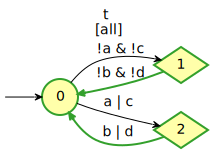

In [4]:
spot.highlight_strategy(g)

In [5]:
x = spot.solved_game_to_separated_mealy(g)

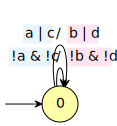

In [6]:
x

In [7]:
x.merge_edges()

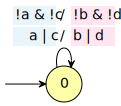

In [8]:
x

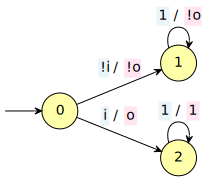

In [9]:
aut = spot.make_twa_graph()
i = buddy.bdd_ithvar(aut.register_ap("i"))
o = buddy.bdd_ithvar(aut.register_ap("o"))
spot.set_synthesis_outputs(aut, o)
aut.new_states(3)
aut.new_edge(0,1,buddy.bdd_not(i)&buddy.bdd_not(o))
aut.new_edge(0,2,i&o)
aut.new_edge(1,1,buddy.bdd_not(o))
aut.new_edge(2,2,buddy.bddtrue)
aut

('o',)


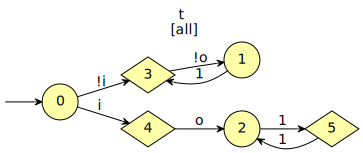

In [10]:
aut_s = spot.split_2step(aut)
print(spot.get_synthesis_output_aps(aut_s))
aut_s

,task,premin_time,reorg_time,partsol_time,player_incomp_time,incomp_time,split_all_let_time,split_min_let_time,split_cstr_time,prob_init_build_time,...,total_time,n_classes,n_refinement,n_lit,n_clauses,n_iteration,n_letters_part,n_bisim_let,n_min_states,done
0,presat,4.8381e-05,7.11e-07,7.143e-06,7.917e-05,5.22e-06,4.519e-06,4.539e-06,2.965e-06,3.167e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN
1,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000223141,2,0,7,12,0,NaN,NaN,4,1


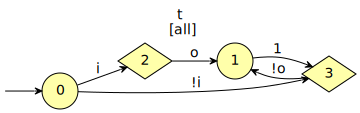

In [11]:
min_lvl = 0
aut_ms, table = spot.minimize_mealy(aut_s, min_lvl, display_log=True, return_log=True)
aut_ms

## A more involved example

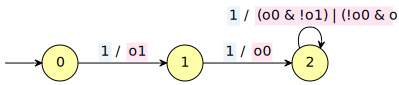

In [12]:
aut = spot.make_twa_graph()
i = buddy.bdd_ithvar(aut.register_ap("i"))
o0 = buddy.bdd_ithvar(aut.register_ap("o0"))
no0 = buddy.bdd_not(o0)
o1 = buddy.bdd_ithvar(aut.register_ap("o1"))
no1 = buddy.bdd_not(o1)
spot.set_synthesis_outputs(aut, o0&o1)

vo1 = o0&o1
vo2 = no0&o1
vo3 = o0&no1

aut.new_states(3)

aut.new_edge(0,1,vo1|vo2)
aut.new_edge(1,2,vo1|vo3)
aut.new_edge(2,2,vo2|vo3)
aut

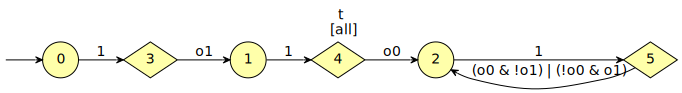

In [13]:
aut_s = spot.split_2step(aut)
aut_s

,task,premin_time,reorg_time,partsol_time,player_incomp_time,incomp_time,split_all_let_time,split_min_let_time,split_cstr_time,prob_init_build_time,...,total_time,n_classes,n_refinement,n_lit,n_clauses,n_iteration,n_letters_part,n_bisim_let,n_min_states,done
0,presat,6.011e-06,1.473e-06,7.765e-06,5.8501e-05,4.298e-06,4.589e-06,5.119e-06,3.496e-06,2.0078e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
1,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,3,6,0,NaN,NaN,NaN,NaN
2,refinement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,10,16,NaN,NaN,NaN,NaN,NaN
3,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000184208,2,0,17,29,1,NaN,NaN,4,1


Number of variables
0    NaN
1      3
2     10
3     17
Name: n_lit, dtype: object


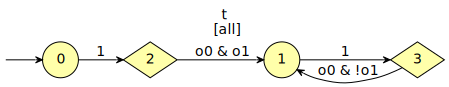

In [14]:
si = spot.synthesis_info()
si.minimize_lvl = 3
aut_ms, table = spot.minimize_mealy(aut_s, si, display_log=True, return_log=True)
print("Number of variables")
print(table["n_lit"])
aut_ms

## Testing dimacs output

In [15]:
import tempfile

si = spot.synthesis_info()
si.minimize_lvl = 3

with tempfile.NamedTemporaryFile(dir='.', suffix='.dimacslog') as t:
    si.opt.set_str("satlogdimacs", t.name)
    aut_ms, table = spot.minimize_mealy(aut_s, si, display_log=True, return_log=True)
    with open(t.name, "r") as f:
        print("".join(f.readlines()))
    
    

,task,premin_time,reorg_time,partsol_time,player_incomp_time,incomp_time,split_all_let_time,split_min_let_time,split_cstr_time,prob_init_build_time,...,total_time,n_classes,n_refinement,n_lit,n_clauses,n_iteration,n_letters_part,n_bisim_let,n_min_states,done
0,presat,6.713e-06,1.964e-06,1.2063e-05,6.2799e-05,6.502e-06,8.035e-06,8.616e-06,7.534e-06,2.7923e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
1,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,3,6,0,NaN,NaN,NaN,NaN
2,refinement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,10,16,NaN,NaN,NaN,NaN,NaN
3,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000316247,2,0,17,29,1,NaN,NaN,4,1


c ### Next Instance 1 0 ###
p cnf 5 5
-1 2 -3 0
1 -3 0
1 -5 0
2 -5 0
3 -5 0
c ### Next Instance 1 1 ###
p cnf 12 15
-1 2 -3 0
4 0
6 0
-9 0
-1 -2 10 0
-10 0
1 -3 0
1 -5 0
1 -12 0
2 -5 0
2 -12 0
-2 9 0
3 -5 0
3 -12 0
7 8 0
c ### Next Instance 2 0 ###
p cnf 19 29
-3 -1 2 0
4 0
6 0
-9 0
-1 -2 10 0
-10 0
11 -16 -17 0
1 -15 -17 0
-1 13 -14 0
-11 13 -16 0
-11 -15 2 0
-13 -15 2 0
1 11 -19 0
13 -19 2 0
15 16 -19 0
3 14 -19 0
-2 0
-12 0
-5 0
1 -3 0
1 -5 0
1 -12 0
2 -5 0
2 -12 0
-2 9 0
3 -5 0
3 -12 0
7 8 0
11 -14 0



# Testing partitioned relabeling

In [16]:
def get_mealy():
    return spot.split_2step(spot.automaton("""HOA: v1
States: 2
Start: 0
AP: 11 "u0accel0accel" "u0accel0f1dcon23p81b" "u0accel0f1dcon231b" "u0gear0f1dmin0f1dcon61b0f1dadd0gear0f1dcon241b1b1b" "u0gear0gear" "u0gear0f1dmax0f1dcon241b0f1dsub0gear0f1dcon241b1b1b" "u0steer0f1dsteering0angle0trackpos1b" "u0steer0steer" "p0p0gt0rpm0f1dcon5523231b" "p0p0lt0rpm0f1dcon32323231b" "p0p0lt0speed0f1dsub0target2speed0f1dmultp0f1dabs0steer1b0f1dcon248881b1b1b"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
controllable-AP: 0 1 2 3 4 5 6 7
--BODY--
State: 0
[!0&!1&2&!3&4&!5&6&!7&!8&!9&!10] 0
[!0&1&!2&!3&4&!5&6&!7&!8&!9&10] 0
[!0&!1&2&!3&!4&5&6&!7&!8&9&!10] 0
[!0&1&!2&!3&!4&5&6&!7&!8&9&10] 0
[!0&!1&2&3&!4&!5&6&!7&8&!9&!10] 0
[!0&1&!2&3&!4&!5&6&!7&8&!9&10] 0
[!0&!1&2&!3&!4&5&!6&7&8&9 | !0&!1&2&!3&!4&5&6&!7&8&9 | !0&!1&2&!3&4&!5&!6&7&8&9 | !0&!1&2&!3&4&!5&6&!7&8&9 | !0&!1&2&3&!4&!5&!6&7&8&9 | !0&!1&2&3&!4&!5&6&!7&8&9 | !0&1&!2&!3&!4&5&!6&7&8&9 | !0&1&!2&!3&!4&5&6&!7&8&9 | !0&1&!2&!3&4&!5&!6&7&8&9 | !0&1&!2&!3&4&!5&6&!7&8&9 | !0&1&!2&3&!4&!5&!6&7&8&9 | !0&1&!2&3&!4&!5&6&!7&8&9 | 0&!1&!2&!3&!4&5&!6&7&8&9 | 0&!1&!2&!3&!4&5&6&!7&8&9 | 0&!1&!2&!3&4&!5&!6&7&8&9 | 0&!1&!2&!3&4&!5&6&!7&8&9 | 0&!1&!2&3&!4&!5&!6&7&8&9 | 0&!1&!2&3&!4&!5&6&!7&8&9] 1
State: 1
[!0&!1&2&!3&!4&5&!6&7 | !0&!1&2&!3&!4&5&6&!7 | !0&!1&2&!3&4&!5&!6&7 | !0&!1&2&!3&4&!5&6&!7 | !0&!1&2&3&!4&!5&!6&7 | !0&!1&2&3&!4&!5&6&!7 | !0&1&!2&!3&!4&5&!6&7 | !0&1&!2&!3&!4&5&6&!7 | !0&1&!2&!3&4&!5&!6&7 | !0&1&!2&!3&4&!5&6&!7 | !0&1&!2&3&!4&!5&!6&7 | !0&1&!2&3&!4&!5&6&!7 | 0&!1&!2&!3&!4&5&!6&7 | 0&!1&!2&!3&!4&5&6&!7 | 0&!1&!2&!3&4&!5&!6&7 | 0&!1&!2&!3&4&!5&6&!7 | 0&!1&!2&3&!4&!5&!6&7 | 0&!1&!2&3&!4&!5&6&!7] 1
--END--"""))

def env_conditions(m):
    sp = spot.get_state_players(m)
    conds = []
    for e in m.edges():
        if sp[e.src]:
            continue
        if not e.cond in conds:
            conds.append(e.cond)
    return conds
print("Conditions in orig machine: ", len(env_conditions(get_mealy())))
ms = get_mealy()
# Relabel only env
spot.partitioned_game_relabel_here(ms, True, False, True, False)
print("Conditions in relabeled machine: ", len(env_conditions(ms)))

Conditions in orig machine:  8
Conditions in relabeled machine:  13


In [17]:
si = spot.synthesis_info()
si.minimize_lvl = 3
# Turn on relabeling
si.opt.set("max_letter_mult", 100000)

mm, log = spot.minimize_mealy(get_mealy(), si, return_log=True)
print("Partitioned env letters:", log["n_letters_part"][0])

Partitioned env letters: 13


In [18]:
# Turn off relabeling
si.opt.set("max_letter_mult", 0)

mm, log = spot.minimize_mealy(get_mealy(), si, return_log=True)
print("Partitioned env letters:", log["n_letters_part"][0])

Partitioned env letters: 0
